# Bolt - Supply and Demand Home Assignement


# Libraries


In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Jovian Commit Pre-requisites



In [31]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1cgvsbD6kj8ennNijI4cjTBNbYdipKKvj')
project_name = "demand-supply-bolt" 
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/poddardelhi/demand-supply-bolt


'https://jovian.ai/poddardelhi/demand-supply-bolt'

# Access to Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Requirements from the task:

1.   Show which 36 hours in a week are most undersupplied. Show/describe your decision based on sample data
2.   24-hour curve of average supply and demand (to illustrate match/mismatch).
3. Visualisation of hours where we lack supply during a weekly period. This one we can send to drivers to show when to online for extra hours.
4. Estimate number of hours needed to ensure we have a high Coverage Ratio during most peak hours.
5. Calculate levels of guaranteed hourly earnings we can offer to drivers during 36 weekly hours with highest demand without losing money + how much extra hours we want to get to capture missed demand.
  
*   Assume that Finished Rides have an average value of €10 (80% goes to driver,
20% is our revenue).
*    Assume the same level of demand with increased supply, base it on RPH over 3 hour periods, but with increased supply.
* Assume that with extra hours we will capture “missed coverage” or people
attributed to “People saw 0 cars” in demand data.


# Supply Data Info:


*   **Date​** – date + hour for which the row of data is presented
*   **Active drivers**​ – number of active drivers (any level of activity) available during time period.
* **Online (h**)​ – total supply hours that were available during time period.
* **Has booking (h)**​ – total hours during which drivers had a client booking (any state).
* **Waiting for booking (h)​** – total hours which drivers spent waiting for booking.
* **Busy (h)**​ – total hours which drivers were not available to take orders in
* **Hours per active driver**​ – average number of hours each driver was online
during time period.
* **Rides per online hour**​ – aka ​RPH​ – avg. finished trips per online hour during period.
* **Finished Rides**​ – number of finished trips during period.

# Demand Data Info:

* **Date​** – date + hour for which the row of data is presented.
* **People saw 0 cars (unique)​** – number of users who didn’t not see a car.
* **People saw 0 cars (unique)​** – number of users who didn’t not see a car.
* **Coverage Ratio (unique)**​ – % of users who saw the car




# Data Profiling

In [ ]:
supply_df = pd.read_csv("/content/drive/MyDrive/Jovian/Bolt_2/Hourly_DriverActivity_1.csv - Hourly_DriverActivity_1.csv.csv")
demand_df = pd.read_csv("/content/drive/MyDrive/Jovian/Bolt_2/Hourly_OverviewSearch_1.csv - Hourly_OverviewSearch_1.csv.csv")

In [ ]:
supply_df.shape

(840, 9)

In [ ]:
demand_df.shape

(839, 4)

In [ ]:
# Merging the two data frames and performing the inner join on date dimension.

df= pd.merge(supply_df, demand_df,on='Date',how='inner')

In [14]:
df.head()

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
0,2016-12-18 23,52,18,6,11,11,0.3,0.67,12.0,9,32,78
1,2016-12-18 22,59,20,11,9,12,0.3,1.40,28.0,29,64,69
2,2016-12-18 21,72,25,7,18,15,0.3,0.64,16.0,5,39,89
3,2016-12-18 20,86,29,7,23,15,0.3,0.52,15.0,13,48,79
4,2016-12-18 19,82,31,14,17,19,0.4,1.16,36.0,12,77,87


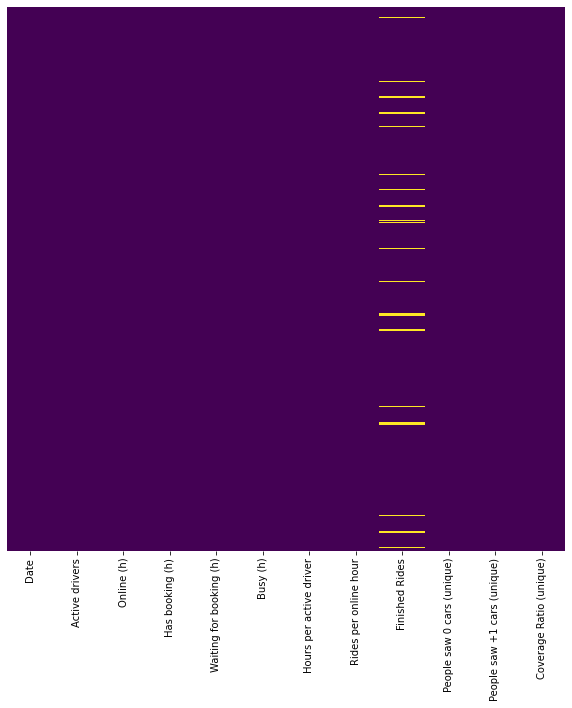

In [ ]:
# Plotting heat map to see the null values
fig= plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(df.isna(),yticklabels= False,cbar=False, cmap='viridis')

# Data Cleaning

In [29]:
# Splitting the Date column into Date and Hour and filling NaN values of Finished Rides with 0's

df_date=df['Date'].str.split(' ',expand=True)

# Joining the df_date with the dataframe df and dropping the date column
df_copy= pd.concat([df_date,df],axis=1)

# Dropping the Date column 
df_copy.drop(['Date'], axis=1, inplace=True)

# Renaming the columns to Date and Hour
df_copy.rename(columns={0:'Date', 1:'Hour'}, inplace=True)

# Replacing NaN values with 0's
df_copy['Finished Rides']= df_copy['Finished Rides'].fillna(0)

# converting the date column into the datetime data type
df_copy['Date']=pd.to_datetime(df_copy['Date'])

# Adding additional dimension "Week" to the dataframe

df_copy['Day of Week']= df_copy['Date'].dt.dayofweek

# re-ordering the columns
df_copy= df_copy[['Date','Hour','Day of Week', 'Active drivers','Online (h)', 'Has booking (h)', 'Waiting for booking (h)', 'Busy (h)','Hours per active driver','Rides per online hour','Finished Rides', 'People saw 0 cars (unique)','People saw +1 cars (unique)','Coverage Ratio (unique)']]

In [30]:
df_copy.head()

,Date,Hour,Day of Week,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
0,2016-12-18,23,6,52,18,6,11,11,0.3,0.67,12.0,9,32,78
1,2016-12-18,22,6,59,20,11,9,12,0.3,1.40,28.0,29,64,69
2,2016-12-18,21,6,72,25,7,18,15,0.3,0.64,16.0,5,39,89
3,2016-12-18,20,6,86,29,7,23,15,0.3,0.52,15.0,13,48,79
4,2016-12-18,19,6,82,31,14,17,19,0.4,1.16,36.0,12,77,87
